In [3]:
import mysql.connector
conn=mysql.connector.connect(
    host='localhost',
    user='root',
    password='root',
    database='nutrition_paradox'
)

if conn.is_connected():
    print('Connection made successfully')
conn.close()



Connection made successfully


In [5]:
# Fetch
url_adult_obesity = "https://ghoapi.azureedge.net/api/NCD_BMI_30C"
response = requests.get(url_adult_obesity)
adult_obesity = pd.DataFrame(response.json()['value'])

# Keep & Rename Columns
cols = ['TimeDim','Dim1','NumericValue','Low','High','ParentLocation','SpatialDim']
adult_obesity = adult_obesity[cols].rename(columns={
    'TimeDim':'Year',
    'Dim1':'Gender',
    'NumericValue':'Mean_Estimate',
    'Low':'LowerBound',
    'High':'UpperBound',
    'ParentLocation':'Region',
    'SpatialDim':'Country'
})

# Add new columns
adult_obesity['Age_Group'] = 'Adult'
adult_obesity['CI_Width'] = adult_obesity['UpperBound'] - adult_obesity['LowerBound']

# Categorize
adult_obesity['Obesity_Level'] = 'Low'
adult_obesity.loc[(adult_obesity['Mean_Estimate'] >= 25) & (adult_obesity['Mean_Estimate'] < 30), 'Obesity_Level'] = 'Moderate'
adult_obesity.loc[adult_obesity['Mean_Estimate'] >= 30, 'Obesity_Level'] = 'High'

import pycountry

def get_country_name(country_code):
    try:
        country = pycountry.countries.lookup(country_code)
        return country.name
    except LookupError:
        return country_code 
# Fix country names
adult_obesity['Country'] = adult_obesity['Country'].apply(get_country_name)

# ✅ Year filter
adult_obesity = adult_obesity[(adult_obesity['Year'] >= 2012) & (adult_obesity['Year'] <= 2022)]


In [6]:
adult_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6930 entries, 2 to 20785
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           6930 non-null   int64  
 1   Gender         6930 non-null   object 
 2   Mean_Estimate  6930 non-null   float64
 3   LowerBound     6930 non-null   float64
 4   UpperBound     6930 non-null   float64
 5   Region         6567 non-null   object 
 6   Country        6930 non-null   object 
 7   Age_Group      6930 non-null   object 
 8   CI_Width       6930 non-null   float64
 9   Obesity_Level  6930 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 595.5+ KB


In [7]:
url_child_obesity = "https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C"
response = requests.get(url_child_obesity)
child_obesity = pd.DataFrame(response.json()['value'])

child_obesity = child_obesity[cols].rename(columns={
    'TimeDim':'Year',
    'Dim1':'Gender',
    'NumericValue':'Mean_Estimate',
    'Low':'LowerBound',
    'High':'UpperBound',
    'ParentLocation':'Region',
    'SpatialDim':'Country'
})

child_obesity['Age_Group'] = 'Child/Adolescent'
child_obesity['CI_Width'] = child_obesity['UpperBound'] - child_obesity['LowerBound']

child_obesity['Obesity_Level'] = 'Low'
child_obesity.loc[(child_obesity['Mean_Estimate'] >= 25) & (child_obesity['Mean_Estimate'] < 30), 'Obesity_Level'] = 'Moderate'
child_obesity.loc[child_obesity['Mean_Estimate'] >= 30, 'Obesity_Level'] = 'High'

child_obesity['Country'] = child_obesity['Country'].apply(get_country_name)

# ✅ Year filter
child_obesity = child_obesity[(child_obesity['Year'] >= 2012) & (child_obesity['Year'] <= 2022)]


In [8]:
child_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20790 entries, 1 to 62364
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           20790 non-null  int64  
 1   Gender         20790 non-null  object 
 2   Mean_Estimate  20790 non-null  float64
 3   LowerBound     20790 non-null  float64
 4   UpperBound     20790 non-null  float64
 5   Region         19701 non-null  object 
 6   Country        20790 non-null  object 
 7   Age_Group      20790 non-null  object 
 8   CI_Width       20790 non-null  float64
 9   Obesity_Level  20790 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.7+ MB


In [9]:
print(child_obesity['Gender'].unique())
print(child_obesity['Year'].nunique())
print(child_obesity['Country'].nunique())


['SEX_FMLE' 'SEX_BTSX' 'SEX_MLE']
11
210


In [10]:
# Combine adult & child obesity datasets
obesity_combined = pd.concat([adult_obesity, child_obesity], ignore_index=True)

# Quick check
print(obesity_combined.shape)
display(obesity_combined.head())


(27720, 10)


,Year,Gender,Mean_Estimate,LowerBound,UpperBound,Region,Country,Age_Group,CI_Width,Obesity_Level
0,2020,SEX_MLE,17.487641,15.793777,19.245727,Eastern Mediterranean,"Iran, Islamic Republic of",Adult,3.451950,Low
1,2020,SEX_MLE,28.335530,23.089589,33.815336,Eastern Mediterranean,Iraq,Adult,10.725747,Moderate
2,2014,SEX_FMLE,27.948704,24.924766,31.213260,Europe,Greenland,Adult,6.288494,Moderate
3,2019,SEX_FMLE,31.893221,28.160682,35.574925,Europe,Armenia,Adult,7.414243,High
4,2018,SEX_BTSX,33.694205,29.905805,37.470856,Europe,Malta,Adult,7.565051,High


In [11]:
url_adult_malnutrition = "https://ghoapi.azureedge.net/api/NCD_BMI_18C"
response = requests.get(url_adult_malnutrition)
adult_malnutrition = pd.DataFrame(response.json()['value'])

adult_malnutrition = adult_malnutrition[cols].rename(columns={
    'TimeDim':'Year',
    'Dim1':'Gender',
    'NumericValue':'Mean_Estimate',
    'Low':'LowerBound',
    'High':'UpperBound',
    'ParentLocation':'Region',
    'SpatialDim':'Country'
})

adult_malnutrition['Age_Group'] = 'Adult'
adult_malnutrition['CI_Width'] = adult_malnutrition['UpperBound'] - adult_malnutrition['LowerBound']

adult_malnutrition['Malnutrition_Level'] = 'Low'
adult_malnutrition.loc[(adult_malnutrition['Mean_Estimate'] >= 10) & (adult_malnutrition['Mean_Estimate'] < 20), 'Malnutrition_Level'] = 'Moderate'
adult_malnutrition.loc[adult_malnutrition['Mean_Estimate'] >= 20, 'Malnutrition_Level'] = 'High'

adult_malnutrition['Country'] = adult_malnutrition['Country'].apply(get_country_name)

# ✅ Year filter
adult_malnutrition = adult_malnutrition[(adult_malnutrition['Year'] >= 2012) & (adult_malnutrition['Year'] <= 2022)]


In [12]:
adult_malnutrition.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6930 entries, 0 to 20787
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                6930 non-null   int64  
 1   Gender              6930 non-null   object 
 2   Mean_Estimate       6930 non-null   float64
 3   LowerBound          6930 non-null   float64
 4   UpperBound          6930 non-null   float64
 5   Region              6567 non-null   object 
 6   Country             6930 non-null   object 
 7   Age_Group           6930 non-null   object 
 8   CI_Width            6930 non-null   float64
 9   Malnutrition_Level  6930 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 595.5+ KB


In [13]:
url_child_malnutrition = "https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"
response = requests.get(url_child_malnutrition)
child_malnutrition = pd.DataFrame(response.json()['value'])

child_malnutrition = child_malnutrition[cols].rename(columns={
    'TimeDim':'Year',
    'Dim1':'Gender',
    'NumericValue':'Mean_Estimate',
    'Low':'LowerBound',
    'High':'UpperBound',
    'ParentLocation':'Region',
    'SpatialDim':'Country'
})

child_malnutrition['Age_Group'] = 'Child/Adolescent'
child_malnutrition['CI_Width'] = child_malnutrition['UpperBound'] - child_malnutrition['LowerBound']

child_malnutrition['Malnutrition_Level'] = 'Low'
child_malnutrition.loc[(child_malnutrition['Mean_Estimate'] >= 10) & (child_malnutrition['Mean_Estimate'] < 20), 'Malnutrition_Level'] = 'Moderate'
child_malnutrition.loc[child_malnutrition['Mean_Estimate'] >= 20, 'Malnutrition_Level'] = 'High'

child_malnutrition['Country'] = child_malnutrition['Country'].apply(get_country_name)

# ✅ Year filter
child_malnutrition = child_malnutrition[(child_malnutrition['Year'] >= 2012) & (child_malnutrition['Year'] <= 2022)]


In [14]:
child_malnutrition.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20790 entries, 0 to 62369
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                20790 non-null  int64  
 1   Gender              20790 non-null  object 
 2   Mean_Estimate       20790 non-null  float64
 3   LowerBound          20790 non-null  float64
 4   UpperBound          20790 non-null  float64
 5   Region              19701 non-null  object 
 6   Country             20790 non-null  object 
 7   Age_Group           20790 non-null  object 
 8   CI_Width            20790 non-null  float64
 9   Malnutrition_Level  20790 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.7+ MB


In [15]:
# Combine adult & child obesity datasets
malnutrition_combined = pd.concat([adult_malnutrition, child_malnutrition], ignore_index=True)

# Quick check
print(malnutrition_combined.shape)
display(malnutrition_combined.head())


(27720, 10)


,Year,Gender,Mean_Estimate,LowerBound,UpperBound,Region,Country,Age_Group,CI_Width,Malnutrition_Level
0,2012,SEX_FMLE,18.710558,10.431367,28.331265,Africa,South Sudan,Adult,17.899898,Moderate
1,2013,SEX_MLE,14.459844,5.605588,26.068127,Africa,Burundi,Adult,20.462539,Moderate
2,2021,SEX_FMLE,5.795110,3.972036,8.077021,Africa,Gabon,Adult,4.104985,Low
3,2017,SEX_BTSX,3.090652,2.428230,3.842155,Western Pacific,Mongolia,Adult,1.413925,Low
4,2016,SEX_FMLE,8.371724,6.655668,10.253121,Africa,Sierra Leone,Adult,3.597453,Low


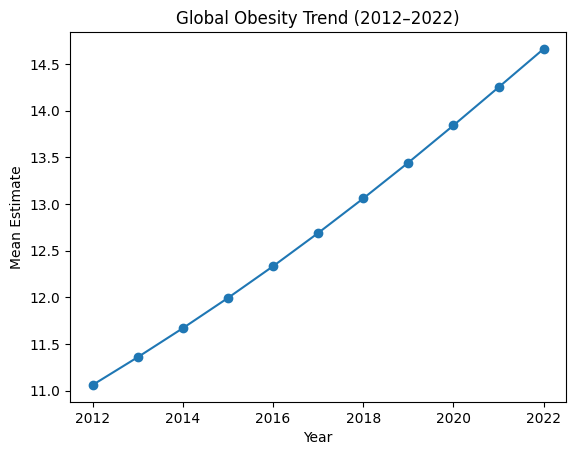

In [16]:
obesity_yearly = obesity_combined.groupby('Year')['Mean_Estimate'].mean().reset_index()

# Line plot
import matplotlib.pyplot as plt
plt.plot(obesity_yearly['Year'], obesity_yearly['Mean_Estimate'], marker='o')
plt.title("Global Obesity Trend (2012–2022)")
plt.xlabel("Year")
plt.ylabel("Mean Estimate")
plt.show()


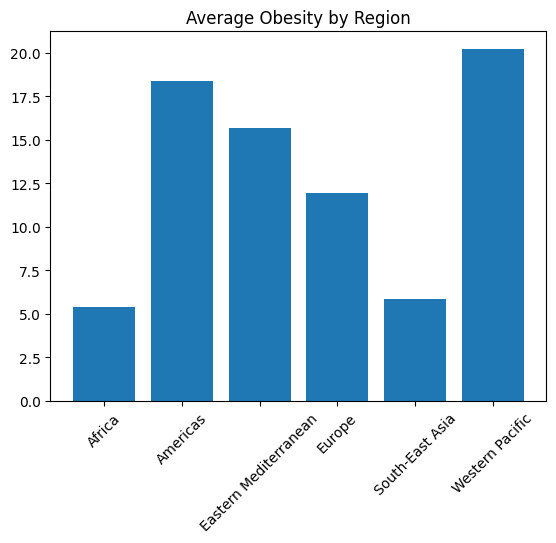

In [17]:
obesity_regionwise = obesity_combined.groupby('Region')['Mean_Estimate'].mean().reset_index()

plt.bar(obesity_regionwise['Region'], obesity_regionwise['Mean_Estimate'])
plt.title("Average Obesity by Region")
plt.xticks(rotation=45)
plt.show()


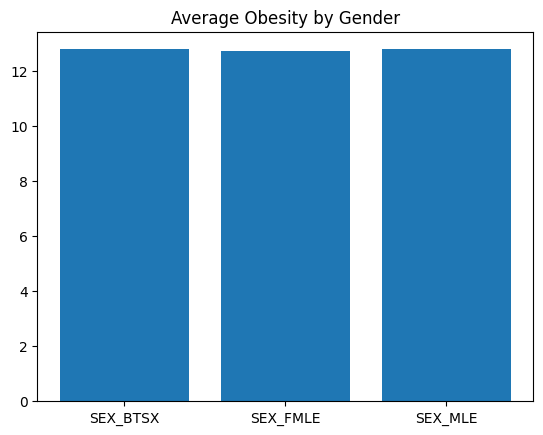

In [18]:
obesity_genderwise = obesity_combined.groupby('Gender')['Mean_Estimate'].mean().reset_index()

plt.bar(obesity_genderwise['Gender'], obesity_genderwise['Mean_Estimate'])
plt.title("Average Obesity by Gender")
plt.show()


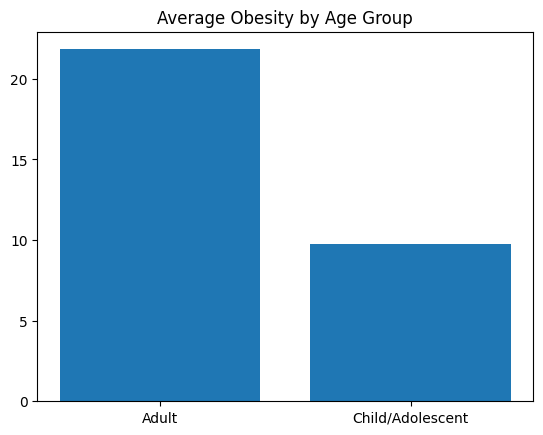

In [19]:
obesity_agewise = obesity_combined.groupby('Age_Group')['Mean_Estimate'].mean().reset_index()

plt.bar(obesity_agewise['Age_Group'], obesity_agewise['Mean_Estimate'])
plt.title("Average Obesity by Age Group")
plt.show()


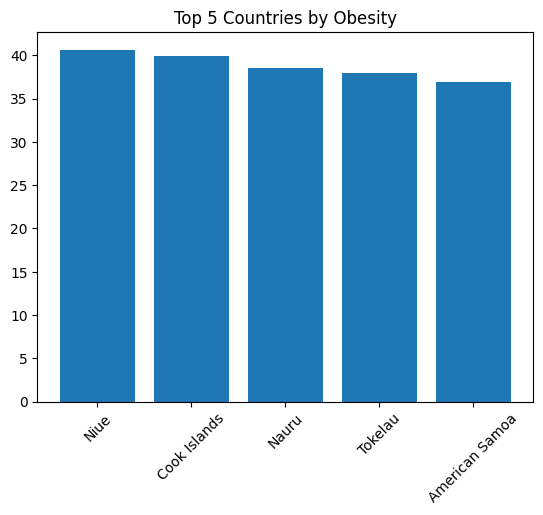

In [20]:
obesity_top5_countries = (
    obesity_combined.groupby('Country')['Mean_Estimate']
    .mean()
    .reset_index()
    .sort_values(by='Mean_Estimate', ascending=False)
    .head(5)
)

plt.bar(obesity_top5_countries['Country'], obesity_top5_countries['Mean_Estimate'])
plt.title("Top 5 Countries by Obesity")
plt.xticks(rotation=45)
plt.show()


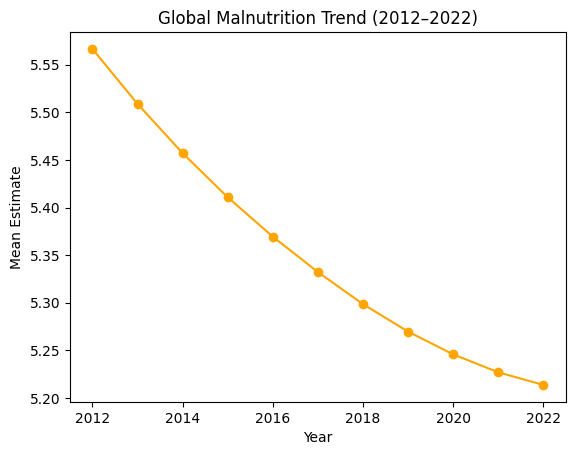

In [21]:
malnutrition_yearly = malnutrition_combined.groupby('Year')['Mean_Estimate'].mean().reset_index()

plt.plot(malnutrition_yearly['Year'], malnutrition_yearly['Mean_Estimate'], marker='o', color='orange')
plt.title("Global Malnutrition Trend (2012–2022)")
plt.xlabel("Year")
plt.ylabel("Mean Estimate")
plt.show()


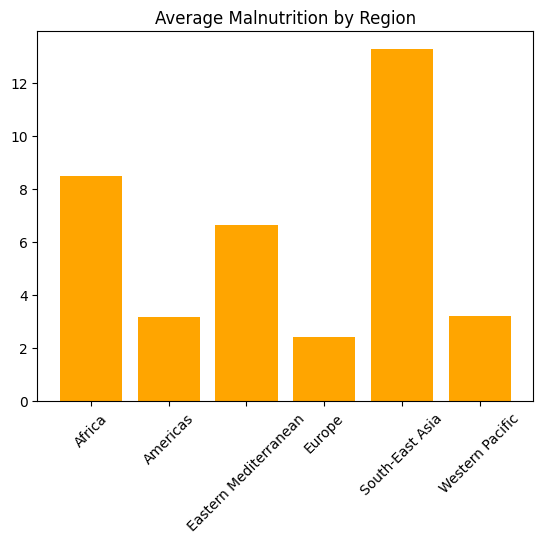

In [22]:
malnutrition_regionwise = malnutrition_combined.groupby('Region')['Mean_Estimate'].mean().reset_index()

plt.bar(malnutrition_regionwise['Region'], malnutrition_regionwise['Mean_Estimate'], color='orange')
plt.title("Average Malnutrition by Region")
plt.xticks(rotation=45)
plt.show()


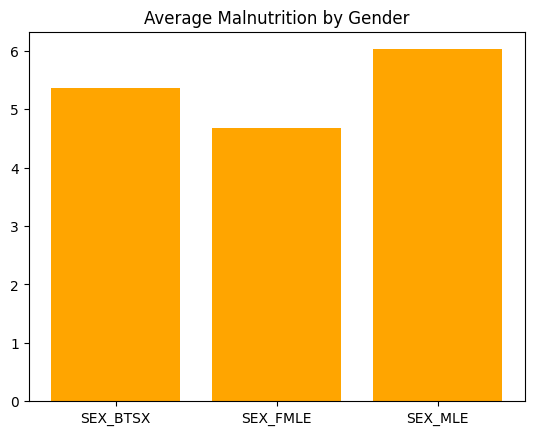

In [23]:
malnutrition_genderwise = malnutrition_combined.groupby('Gender')['Mean_Estimate'].mean().reset_index()

plt.bar(malnutrition_genderwise['Gender'], malnutrition_genderwise['Mean_Estimate'], color='orange')
plt.title("Average Malnutrition by Gender")
plt.show()


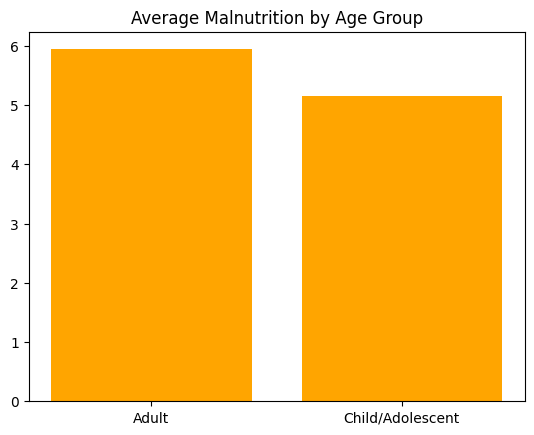

In [24]:
malnutrition_agewise = malnutrition_combined.groupby('Age_Group')['Mean_Estimate'].mean().reset_index()

plt.bar(malnutrition_agewise['Age_Group'], malnutrition_agewise['Mean_Estimate'], color='orange')
plt.title("Average Malnutrition by Age Group")
plt.show()


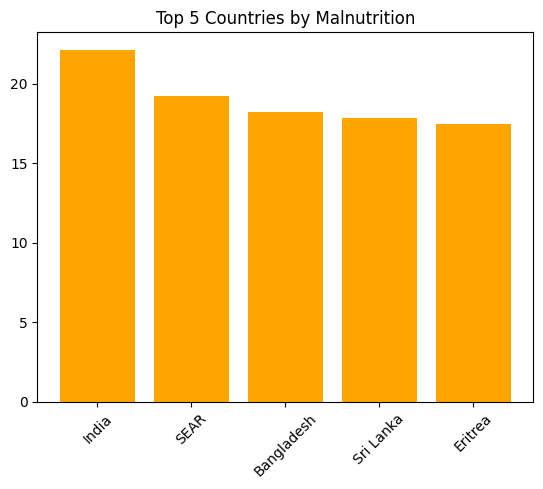

In [25]:
malnutrition_top5_countries = (
    malnutrition_combined.groupby('Country')['Mean_Estimate']
    .mean()
    .reset_index()
    .sort_values(by='Mean_Estimate', ascending=False)
    .head(5)
)

plt.bar(malnutrition_top5_countries['Country'], malnutrition_top5_countries['Mean_Estimate'], color='orange')
plt.title("Top 5 Countries by Malnutrition")
plt.xticks(rotation=45)
plt.show()


In [27]:
# Rename columns for clarity
obesity_yearly = obesity_yearly.rename(columns={'Mean_Estimate':'Obesity_Estimate'})
malnutrition_yearly = malnutrition_yearly.rename(columns={'Mean_Estimate':'Malnutrition_Estimate'})

# Merge on Year
obesity_malnutrition_yearly = pd.merge(obesity_yearly, malnutrition_yearly, on='Year')


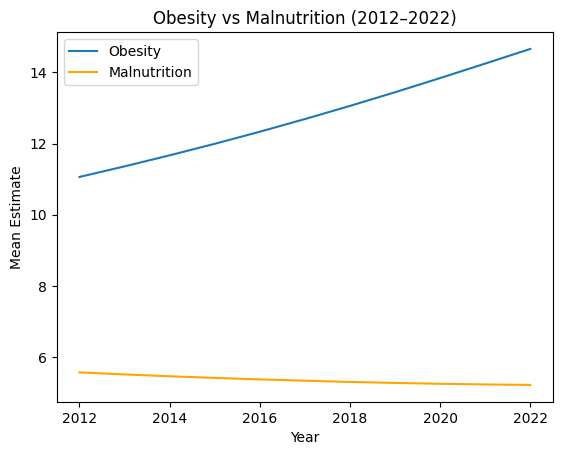

In [28]:
x = obesity_malnutrition_yearly['Year']

plt.plot(x, obesity_malnutrition_yearly['Obesity_Estimate'], label='Obesity')
plt.plot(x, obesity_malnutrition_yearly['Malnutrition_Estimate'], label='Malnutrition', color='orange')

plt.title("Obesity vs Malnutrition (2012–2022)")
plt.xlabel("Year")
plt.ylabel("Mean Estimate")
plt.legend()
plt.show()
